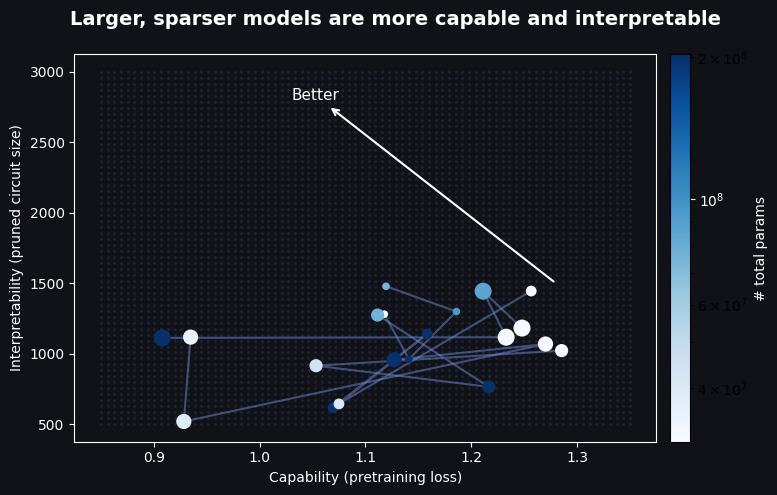

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Fake data: 5 model sizes × 4 sparsity levels
np.random.seed(0)
n_models = 5
n_points = 4

capability = 0.9 + 0.4 * np.random.rand(n_models, n_points)   # x
interpret = 10**3 * (0.5 + np.random.rand(n_models, n_points)) # y
total_params = 10**(7 + np.random.rand(n_models, n_points)*2)  # 1e7–1e9
nonzero_params = np.array([0.9, 1.9, 3.7, 7.4, 14.8]) * 1e6    # marker size scale

fig, ax = plt.subplots(figsize=(8, 5), facecolor="#111218")
ax.set_facecolor("#111218")

# dotted background - small grid of points
xs = np.linspace(0.85, 1.35, 80)
ys = np.linspace(5e2, 3e3, 60)
xx, yy = np.meshgrid(xs, ys)
ax.scatter(xx, yy, s=1, color="#222637", alpha=0.9, zorder=0)

# Plot each model size as a connected series
for i in range(n_models):
    c = total_params[i]
    s = (i+1) * 30  # scale for visibility, not literal params
    sc = ax.scatter(capability[i], interpret[i],
                    c=c, s=s, cmap="Blues", norm=LogNorm(),
                    edgecolor="none", zorder=3)
    ax.plot(capability[i], interpret[i],
            color="#6f8dd8", alpha=0.5, zorder=2)

# Log-ish styling: use scalar data but scientific tick labels
ax.set_xlabel("Capability (pretraining loss)", color="white")
ax.set_ylabel("Interpretability (pruned circuit size)", color="white")
ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("white")

# Colorbar for total params
cbar = fig.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label("# total params", color="white")
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="white")

# Title
fig.suptitle("Larger, sparser models are more capable and interpretable",
             color="white", fontsize=14, weight="bold")

# "Better" annotation
ax.annotate("Better",
            xy=(1.28, 1500), xycoords="data",
            xytext=(1.03, 2800), textcoords="data",
            arrowprops=dict(arrowstyle="<-", color="white", lw=1.5),
            color="white", fontsize=11)

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# Use a dark base template
pio.templates.default = "plotly_dark"  # built-in dark theme [Plotly Templates 2025](https://plotly.com/python/templates/)

# Fake data: 5 model sizes × 4 sparsity levels
np.random.seed(0)
n_models = 5
n_points = 4

capability = 0.9 + 0.4 * np.random.rand(n_models, n_points)
interpret = 500 + 2500 * np.random.rand(n_models, n_points)
total_params = 10**(7 + 2 * np.random.rand(n_models, n_points))  # 1e7–1e9
nonzero_params = np.array([0.9, 1.9, 3.7, 7.4, 14.8]) * 1e6      # exemplar scale

# We flatten for plotting, but also keep a "model_id" for line grouping
model_ids = np.repeat(np.arange(n_models), n_points)

# Build the base figure
fig = go.Figure()

# Dotted background using a separate scatter trace
xs = np.linspace(0.85, 1.35, 80)
ys = np.linspace(500, 3000, 60)
xx, yy = np.meshgrid(xs, ys)

fig.add_trace(
    go.Scatter(
        x=xx.flatten(),
        y=yy.flatten(),
        mode="markers",
        marker=dict(size=2, color="#222637"),
        hoverinfo="skip",
        showlegend=False
    )
)

# For each model size, add a line+markers series
for i in range(n_models):
    fig.add_trace(
        go.Scatter(
            x=capability[i],
            y=interpret[i],
            mode="lines+markers",
            name=f"Model {i+1}",
            marker=dict(
                size=12 + 4 * i,           # illustrative; you can map nonzero_params here
                color=total_params[i],
                colorscale="Blues",
                colorbar=dict(
                    title="# total params",
                    ticks="outside",
                ),
                showscale=True if i == 0 else False,
            ),
            line=dict(color="rgba(130, 150, 220, 0.6)", width=2),
            hovertemplate=(
                "Capability: %{x:.3f}<br>"
                "Interpretability: %{y:.0f}<br>"
                "Total params: %{marker.color:.2e}<extra></extra>"
            ),
        )
    )

# Global layout styling
fig.update_layout(
    title=dict(
        text="Larger, sparser models are more capable and interpretable",
        x=0.5,
        xanchor="center",
        font=dict(size=22, family="Arial Black")
    ),
    xaxis=dict(
        title="Capability (pretraining loss)",
        showgrid=False,
        zeroline=False,
    ),
    yaxis=dict(
        title="Interpretability (pruned circuit size)",
        showgrid=False,
        zeroline=False,
    ),
    plot_bgcolor="#111218",
    paper_bgcolor="#111218",
    font=dict(color="white"),
    legend=dict(
        title="Model size group",
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(255,255,255,0.2)",
        borderwidth=1
    ),
)

# Add a "Better" arrow annotation
fig.add_annotation(
    x=1.28,
    y=1500,
    ax=1.03,
    ay=2800,
    xref="x",
    yref="y",
    axref="x",
    ayref="y",
    text="Better",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="white",
    font=dict(color="white", size=14)
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed